# Synergy Score computation and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_1 = _deepnote_execute_sql('SELECT champName1, champId1, champName2, champId2, occurTime, winTime, (occurTime-winTime) As loseTime, CAST(CAST((winTime-loseTime) AS DECIMAL(10,2))/CAST(occurTime AS DECIMAL(10,2)) AS DECIMAL(10,4)) AS synergy_score\nFROM \'13table2_name.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_1

,champName1,champId1,champName2,champId2,occurTime,winTime,loseTime,synergy_score
0,Rakan,497,Xayah,498,1274,705,569,0.1068
1,Jinx,222,Milio,902,1246,617,629,-0.0096
2,Jinx,222,Thresh,412,1067,561,506,0.0515
3,Aphelios,523,Thresh,412,1016,531,485,0.0453
4,Ezreal,81,Karma,43,837,404,433,-0.0346
...,...,...,...,...,...,...,...,...
13031,Samira,360,Xayah,498,1,0,1,-1.0000
13032,Nidalee,76,Skarner,72,1,0,1,-1.0000
13033,Galio,3,Ryze,13,1,0,1,-1.0000
13034,Rammus,33,Vi,254,3,1,2,-0.3333


In [3]:
df_1.to_csv('13synergy_raw.csv', index = False)
df_1.head(10)

,champName1,champId1,champName2,champId2,occurTime,winTime,loseTime,synergy_score
0,Rakan,497,Xayah,498,1274,705,569,0.1068
1,Jinx,222,Milio,902,1246,617,629,-0.0096
2,Jinx,222,Thresh,412,1067,561,506,0.0515
3,Aphelios,523,Thresh,412,1016,531,485,0.0453
4,Ezreal,81,Karma,43,837,404,433,-0.0346
5,Jinx,222,Lulu,117,719,352,367,-0.0209
6,Yuumi,350,Zeri,221,671,339,332,0.0104
7,Jinx,222,Khazix,121,633,320,313,0.0111
8,Lucian,236,Milio,902,633,336,297,0.0616
9,Ezreal,81,Khazix,121,616,308,308,0.0000


In [4]:
df_2 = _deepnote_execute_sql('SELECT na1.champId as champId1, synergy.champName1, na2.champId as champId2, synergy.champName2, synergy.synergy_score\nFROM(\n    SELECT id.champName1, id.champName2, COALESCE(d.synergy_score, 0) as synergy_score\n    FROM(   \n        SELECT DISTINCT greatest(n1.champName, n2.champName) as champName1, least(n1.champName, n2.champName) as champName2\n        FROM \'13names.csv\' n1, \'13names.csv\' n2\n        ) as id\n    LEFT JOIN df_1 as d\n    ON id.champName1 = d.champName2 and id.champName2 = d.champName1\n    ) as synergy\nJOIN \'13names.csv\' na1 ON synergy.champName1 = na1.champName\nJOIN \'13names.csv\' na2 ON synergy.champName2 = na2.champName\nORDER BY champName2, champName1;', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_2

,champId1,champName1,champId2,champName2,synergy_score
0,266,Aatrox,266,Aatrox,0.0000
1,103,Ahri,266,Aatrox,-0.0429
2,84,Akali,266,Aatrox,-0.0698
3,166,Akshan,266,Aatrox,-0.0588
4,12,Alistar,266,Aatrox,0.0909
...,...,...,...,...,...
13361,142,Zoe,26,Zilean,0.3333
13362,143,Zyra,26,Zilean,0.5000
13363,142,Zoe,142,Zoe,0.0000
13364,143,Zyra,142,Zoe,0.0769


In [5]:
df_2.to_csv('13synergy.csv', index = False)

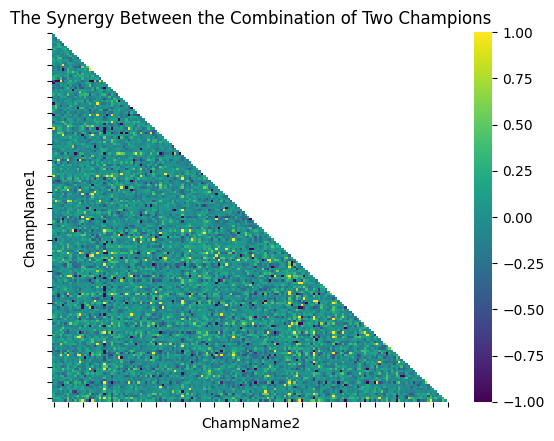

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('13synergy.csv')

corr_matrix = df.pivot(index='champName1', columns='champName2', values='synergy_score')
heatmap = sns.heatmap(corr_matrix, cmap='viridis', annot=False, mask=np.triu(np.ones_like(corr_matrix)), vmin=-1, vmax=1)
# Hide the x-axis and y-axis labels
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.title('The Synergy Between the Combination of Two Champions')
heatmap.set_xlabel("ChampName2")
heatmap.set_ylabel("ChampName1")
plt.show()


In [ ]:
df_3 = _deepnote_execute_sql('SELECT *\nFROM synergy.csv\nWHERE champId1 IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10) AND\nchampId2 IN (1, 2, 3, 4, 5, 6, 7, 8, 9, 10)', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled')
df_3

,champName1,champId1,champName2,champId2,synergy_score
0,Annie,1,Annie,1,0.0000
1,Olaf,2,Annie,1,0.0811
2,Galio,3,Annie,1,0.3750
3,TwistedFate,4,Annie,1,0.0000
4,XinZhao,5,Annie,1,-0.3333
5,Urgot,6,Annie,1,-0.2727
6,Leblanc,7,Annie,1,0.2000
7,Vladimir,8,Annie,1,0.4286
8,Fiddlesticks,9,Annie,1,0.2727
9,Kayle,10,Annie,1,0.2000


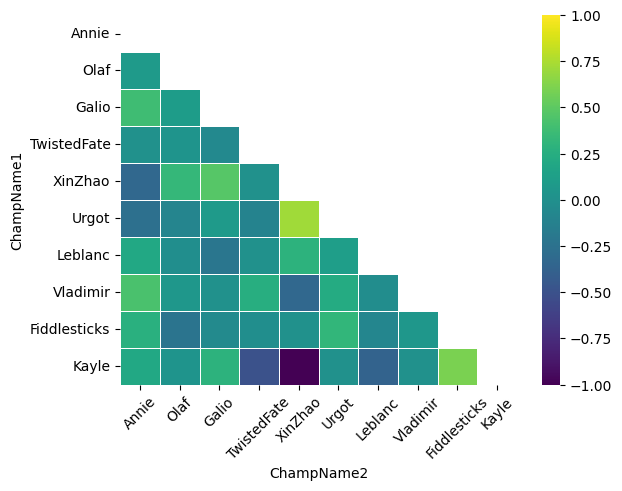

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



corr_matrix = df_3.pivot(index='champId1', columns='champId2', values='synergy_score')
heatmap = sns.heatmap(corr_matrix, cmap='viridis', annot=False, linewidths=.5, mask=np.triu(np.ones_like(corr_matrix)), vmin=-1, vmax=1)

# Define the label mapping
label_mapping = {1: 'Annie', 2: 'Olaf', 3: 'Galio', 4: 'TwistedFate', 5: 'XinZhao', 6: 'Urgot', 7: 'Leblanc', 8: 'Vladimir', 9: 'Fiddlesticks', 10: 'Kayle'}

x_labels = [label_mapping[int(label.get_text())] for label in heatmap.get_xticklabels()]
heatmap.set_xticklabels(x_labels, rotation = 45)

# Set the y-axis labels
y_labels = [label_mapping[int(label.get_text())] for label in heatmap.get_yticklabels()]
heatmap.set_yticklabels(y_labels, rotation = 0)

heatmap.set_xlabel("ChampName2")
heatmap.set_ylabel("ChampName1")

plt.show()

In [6]:
df = pd.read_csv('13version.csv')
data = df.copy()
winrates = pd.read_csv("13table1.csv")

In [7]:
fields = []
data_fields = []

for t in range(1, 3):
    for position in range(1, 6):
        field = f't{t}_champ{position}'
        new_field = f't{t}p{position}_winrate'

        data[field] = df[field].map(winrates.set_index('champName')['winpercent'])
        data = data.rename(columns={field: new_field})

        fields.append(field)
        data_fields.append(new_field)



fields.append('t1_win')
data_fields.append('t1_win')
data[data_fields].to_csv("13winrate.csv", index=False)

In [8]:
fields = ["t1_win", "match_id"]

for t in range(1, 3):
    for position in range(1, 6):
        field = f't{t}_p{position}'
        fields.append(field)


import itertools


names = pd.read_csv('13version.csv').drop(fields, axis=1)
synergy = pd.read_csv('13synergy.csv')

sdict = {}

for index, row in synergy.iterrows():
    champ1 = row['champName1']
    champ2 = row['champName2']

    key = champ1 + '-' + champ2

    value = row['synergy_score']
    sdict[key] = value

In [9]:
t1_synergy = []
t2_synergy = []

for index, row in names.iterrows():
    ally = list(row)[:5]
    oppo = list(row)[5:]
    t1 = 0
    t2 = 0
    
    for pair in itertools.combinations(ally, 2):
        npair = pair[0] + '-' + pair[1]

        if npair in sdict:
            t1 += sdict[npair]
            
        else:
            npair = pair[1] + '-' + pair[0]
            t1 += sdict[npair]
            
    
    for pair in itertools.combinations(oppo, 2):
        npair = pair[0] + '-' + pair[1]

        if npair in sdict:
            t2 += sdict[npair]
        else:
            npair = pair[1] + '-' + pair[0]
            t2 += sdict[npair]

    t1_synergy.append(t1)
    t2_synergy.append(t2)


table = [t1_synergy, t2_synergy]
df = pd.DataFrame({'t1_synergy': t1_synergy, 't2_synergy': t2_synergy})


raw = pd.read_csv('13winrate.csv')
final = pd.concat([raw, df], axis = 1)
col = final.pop('t1_win')
final[col.name] = col
final.to_csv('13data.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e55512df-58ef-402e-8f63-17a773fe09fc' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>